In [32]:
%matplotlib notebook

# Bike Trippin

For this assignment, you will be taking "Cycle Share" data from Seattle and creating charts to determine which gender borrows and uses bikes more often.

* Import your dependencies and then import your data into a pandas data frame from the CSV within the 'Data' folder
* Split up your data into groups based upon the gender column
    * NOTE: There will be a garbage row with a gender of 'stoptime' which you will have to remove!
* Chart your data using a bar graph, giving it both a title and labels for the axes

In [33]:
# import dependencies and csv file
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

trip_data_df = pd.read_csv("Resources/trip.csv", low_memory=False)
trip_data_df.head()

,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960
1,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970
2,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988
3,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977
4,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971


In [34]:
# Split up data into groups based upon gender column, remove stoptime
gender_series = trip_data_df.groupby("gender").size()
gender_series

gender
Female       37562
Male        140564
Other         3431
stoptime         1
dtype: int64

In [35]:
# drop stoptime
gender_df = trip_data_df.loc[trip_data_df["gender"] != "stoptime"]
gender_series = gender_df.groupby("gender").size()
gender_series

gender
Female     37562
Male      140564
Other       3431
dtype: int64

In [38]:
gender_df_2 = pd.DataFrame({"Gender": ["Female","Male","Other"],"Rides":gender_series})

gender_df_2

,Gender,Rides
gender,,
Female,Female,37562
Male,Male,140564
Other,Other,3431


<IPython.core.display.Javascript object>


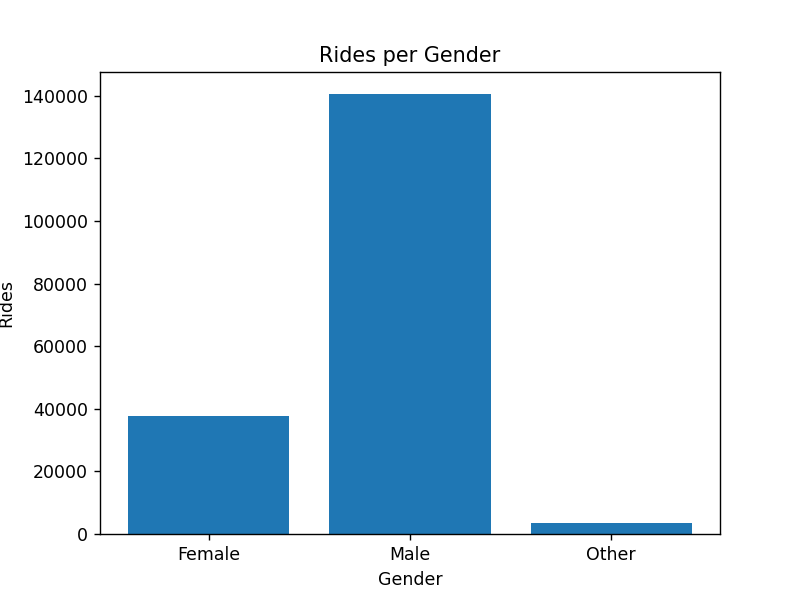

Text(0, 0.5, 'Rides')

In [42]:
# chart data using a bar graph
#gender_df_2.plot(type="bar")
plt.bar(gender_df_2['Gender'],gender_df_2['Rides'])
# add title and axis labels
plt.title("Rides per Gender")
plt.xlabel('Gender')
plt.ylabel('Rides')

# Bonus!

You will now take the same base data frame before and create some code that will allow you to create individual pie charts for each bike. For this part of the activity, we want you to chart the total 'Trip Duration' of each bike, sorted by gender. Bonus points if you can come up with a method to do this without using loc or iloc to filter the original data frame! You can use loc to filter group data though.